**0 Importing important libraries**

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydot

In [ ]:
import tensorflow as tf
from tensorflow import keras

**1 Import ‘Movie_collection’ csv files in data_x and data_y variables.**

In [ ]:
data_x = pd.read_csv("Movie_collection_Independent.csv")
data_y = pd.read_csv("Movie_collection_Target.csv")

**2 Look at the shape and first five rows of both dataframes to understand the data**

In [ ]:
data_x.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [ ]:
data_y.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [ ]:
data_x.shape

(506, 19)

In [ ]:
data_y.shape

(506, 1)

**3 Split the data into test, train, and validation**

In [ ]:
from sklearn.model_selection import train_test_split

# Train:Test :: 75:25 of total dataset
train_size=0.75

# In the first step we will split the data in training and testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(data_x,data_y, train_size=0.75)

# Train:Valid :: 75:25 of training dataset
# we have to define valid_size=0.5 (that is 50% of remaining data)
valid_size = 0.25

X_valid, X_train, y_valid, y_train = train_test_split(X_train_full, y_train_full, test_size=0.25)

**4 Take a look at the shape of the test, train, and validation set**

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(95, 19)
(95, 1)
(284, 19)
(284, 1)
(127, 19)
(127, 1)


(None, None)

**5 Standardize the data**

In [ ]:
from sklearn.preprocessing import StandardScaler # 2nd wala apart from Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

**6 Create an ANN model with 2 dense layers of 30 neurons each**

In [ ]:
from threading import active_count
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[19]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                600       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


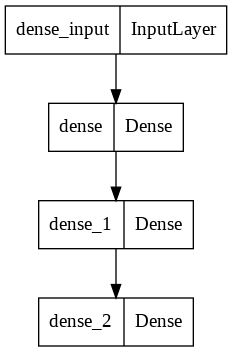

In [ ]:
import pydot
keras.utils.plot_model(model)

**7 Compile the model with loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-2) and metrics=['mae'])**

In [ ]:
model.compile(loss="mean_squared_error", # since here, we are doing regression
              optimizer=keras.optimizers.SGD(lr=1e-3), # Stochastic GD and Value of lr = 0.01
              metrics=['mae']) #optional - mean absolute error

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**8 Train the model for 100 epochs**

In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 [==============================] - 1s 183ms/step - loss: 7.2976 - mae: 2.5846 - val_loss: 6.9842 - val_mae: 2.5238
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 6.6815 - mae: 2.4703 - val_loss: 6.4130 - val_mae: 2.4187
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 6.1509 - mae: 2.3647 - val_loss: 5.9124 - val_mae: 2.3214
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 5.6819 - mae: 2.2682 - val_loss: 5.4673 - val_mae: 2.2303
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 5.2649 - mae: 2.1792 - val_loss: 5.0719 - val_mae: 2.1450
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 4.8891 - mae: 2.0930 - val_loss: 4.7194 - val_mae: 2.0648
Epoch 7/100
3/3 [==============================] - 0s 49ms/step - loss: 4.5516 - mae: 2.0128 - val_loss: 4.4012 - val_mae: 1.9887
Epoch 8/100
3/3 [==============================] - 0s 31ms/step - loss: 4.2447 - mae: 1.9

**9 Evaluate the model performance on the test set**

In [ ]:
mae_test = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.1853 - mae: 0.6222


In [ ]:
model_history.history

{'loss': [7.297590255737305,
  6.681488990783691,
  6.150854587554932,
  5.681915760040283,
  5.264920711517334,
  4.8890814781188965,
  4.551560878753662,
  4.244748592376709,
  3.961958408355713,
  3.707735300064087,
  3.4698119163513184,
  3.253502130508423,
  3.050377368927002,
  2.8642163276672363,
  2.6932225227355957,
  2.5355632305145264,
  2.3916447162628174,
  2.2579734325408936,
  2.1345744132995605,
  2.0206992626190186,
  1.9162455797195435,
  1.8190436363220215,
  1.7283145189285278,
  1.6460366249084473,
  1.56964910030365,
  1.496942162513733,
  1.4314501285552979,
  1.3694477081298828,
  1.3127496242523193,
  1.2604608535766602,
  1.2101635932922363,
  1.1638743877410889,
  1.1208302974700928,
  1.0807753801345825,
  1.0433017015457153,
  1.0088109970092773,
  0.9764364957809448,
  0.9461092352867126,
  0.9180073738098145,
  0.8911014199256897,
  0.8659602999687195,
  0.8421552181243896,
  0.8203485608100891,
  0.8002747297286987,
  0.7807899713516235,
  0.762419223785

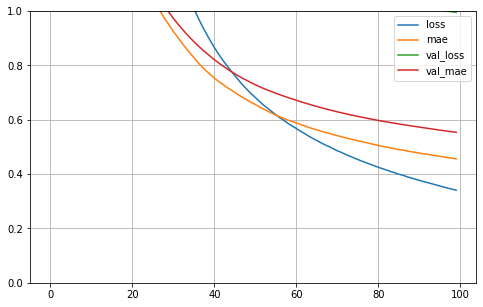

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis between 0 and 1
plt.show()

**10 Predict the values of the first 5 test records**

In [ ]:
X_new = X_test[:5]

In [ ]:
y_pred = model.predict(X_new)
y_pred

array([[1.7700222],
       [1.3417326],
       [2.3551064],
       [2.3515644],
       [1.0092493]], dtype=float32)

In [ ]:
y_test[:5]

,Collection
60,1.913333
142,1.560000
53,2.226667
163,4.000000
474,1.586667
